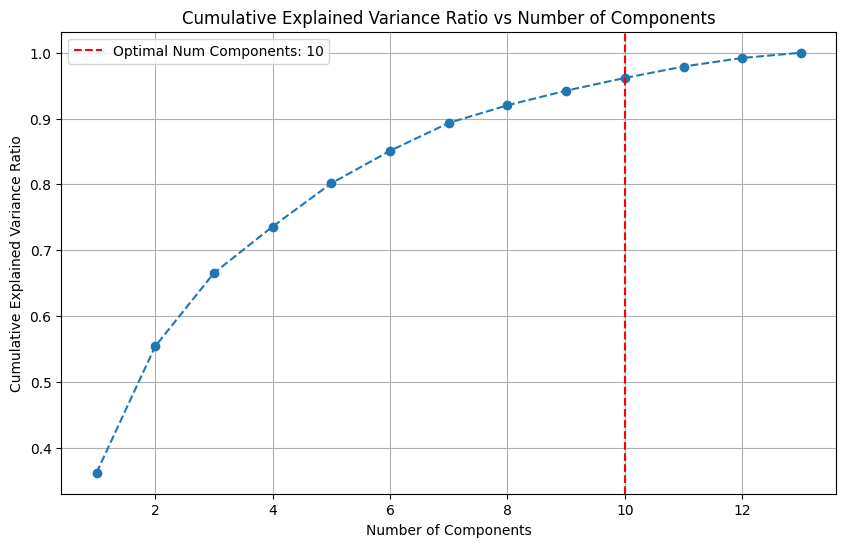

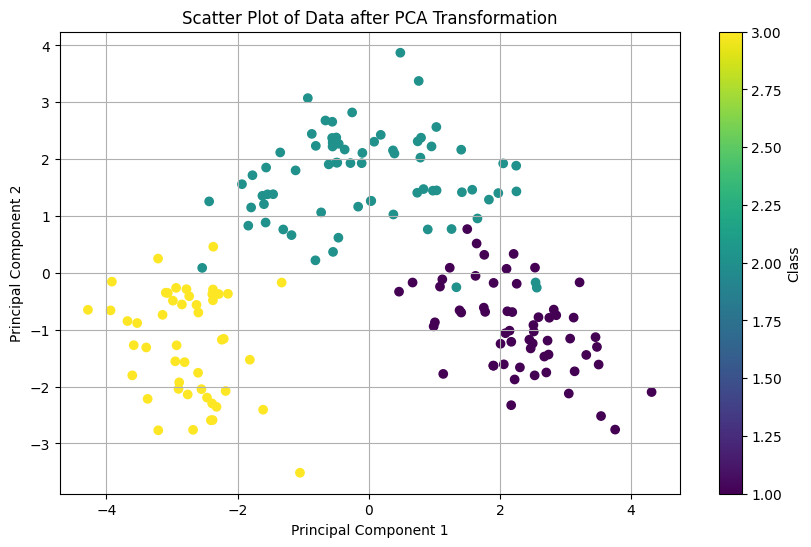

C:\Users\sumit bhot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.2848589191898989


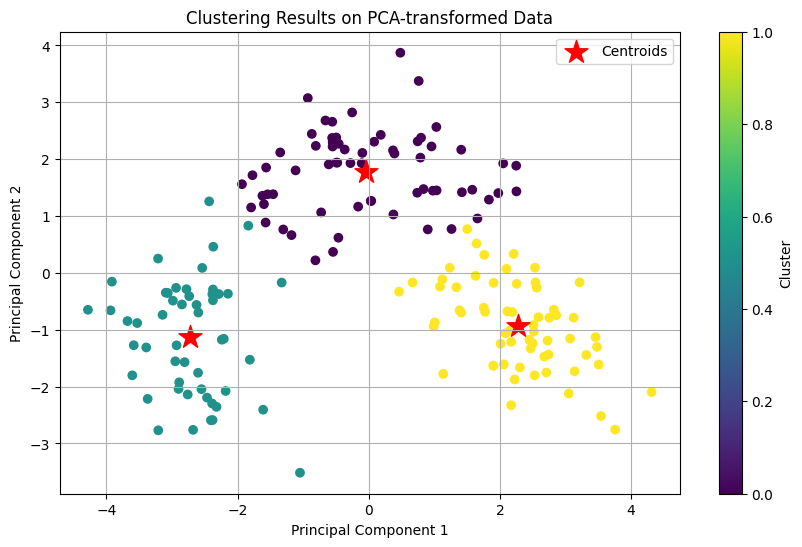

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset into a Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 
                'Magnesium', 'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 
                'Proanthocyanins', 'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']
wine_data = pd.read_csv(url, names=column_names)

# Separate features and target variable
X = wine_data.drop('Class', axis=1)
y = wine_data['Class']

# Data preprocessing: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Visualize the results of PCA
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs Number of Components')
plt.axvline(x=optimal_num_components, color='red', linestyle='--', label=f'Optimal Num Components: {optimal_num_components}')
plt.legend()
plt.grid()
plt.show()

# Scatter plot after PCA transformation
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data after PCA Transformation')
plt.colorbar(label='Class')
plt.grid()
plt.show()

# Perform clustering on PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Calculate silhouette score for clustering
silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results on PCA-transformed Data')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid()
plt.show()


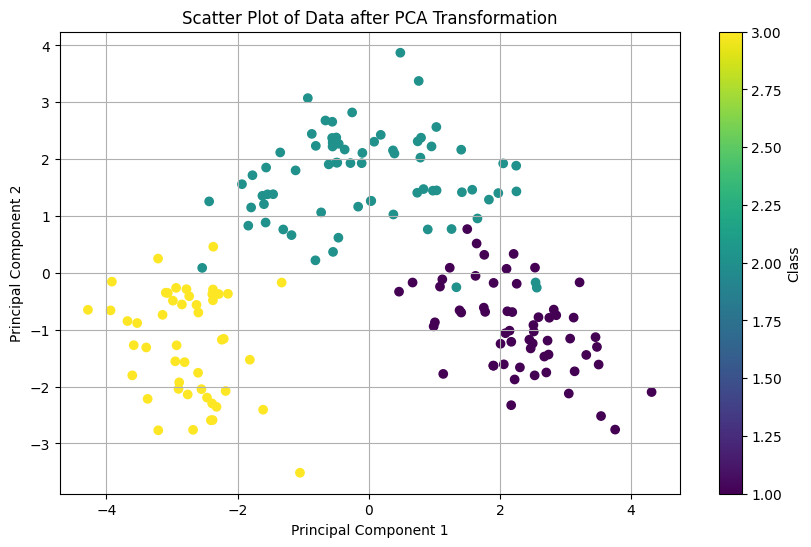

In [2]:
# Scatter plot after PCA transformation
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Data after PCA Transformation')
plt.colorbar(label='Class')
plt.grid()
plt.show()

In [3]:
# Perform clustering on PCA-transformed data using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)


C:\Users\sumit bhot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
